In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

import matplotlib.pyplot as plt; 
import pandas as pd
plt.rcdefaults()
%matplotlib inline

import PIL
import glob
import scikitplot as skplt

In [2]:
X_input = []
input_names = ["Band 1", "Band 2", "Band 3", "Band 4", "Band 6", "MRH", "MSH", "MTE", "MVI"]
X_names = np.asarray(input_names)

Y_output = []

In [3]:
Sa1_files = glob.glob("sa1_16to20_cleaned/*.png")

In [4]:
len(Sa1_files)

346

In [5]:
for filename in Sa1_files:
    filename = filename.split('/')[1]
    
    # Satellite 1
    Sa_1_File = "sa1_256/" + filename;
    Sa1 = PIL.Image.open(Sa_1_File).convert("L")
    Sa1arr = np.array(Sa1).flatten()
    
    
    # Satellite 2
    Sa_2_File = "sa2_256/" + filename;
    Sa2 = PIL.Image.open(Sa_2_File).convert("L")
    Sa2arr = np.array(Sa2).flatten()
    
    
    # Satellite 3
    Sa_3_File = "sa3_256/" + filename;
    Sa3 = PIL.Image.open(Sa_3_File).convert("L")
    Sa3arr = np.array(Sa3).flatten()
    
    # Satellite 4
    Sa_4_File = "sa4_256/" + filename;
    Sa4 = PIL.Image.open(Sa_4_File).convert("L")
    Sa4arr = np.array(Sa4).flatten()
    
    # Satellite 6
    Sa_6_File = "sa6_256/" + filename;
    Sa6 = PIL.Image.open(Sa_6_File).convert("L")
    Sa6arr = np.array(Sa6).flatten()
    
    
    
    # MRH
    MRH_File = "mrh_256/" + filename.replace('sat', "nam", 1)
    MRH = PIL.Image.open(MRH_File).convert("L")
    MRHarr = np.array(MRH).flatten()
    
    # MSH
    MSH_File = "msh_256/" + filename.replace('sat', "nam", 1)
    MSH = PIL.Image.open(MSH_File).convert("L")
    MSHarr = np.array(MSH).flatten()
    
    # MTE
    MTE_File = "mte_256/" + filename.replace('sat', "nam", 1)
    MTE = PIL.Image.open(MTE_File).convert("L")
    MTEarr = np.array(MTE).flatten()
    
    # MVI
    MVI_File = "mvi_256/" + filename.replace('sat', "nam", 1)
    MVI = PIL.Image.open(MVI_File).convert("L")
    MVIarr = np.array(MVI).flatten()
    

    
    # Radar
    Radar_File = "rad_256/" + filename.replace('sat', "rad", 1)
    Radar = PIL.Image.open(Radar_File).convert("L")
    Radararr = np.array(Radar).flatten()
    
    
    
    for i in range(len(Sa1arr)):
        x = [];
        x.append(Sa1arr[i])
        x.append(Sa2arr[i])
        x.append(Sa3arr[i])
        x.append(Sa4arr[i])
        x.append(Sa6arr[i])
        
        x.append(MRHarr[i])
        x.append(MSHarr[i])
        x.append(MTEarr[i])
        x.append(MVIarr[i])
        
        Y_output.append(Radararr[i])
        
        X_input.append(x)

In [6]:
X_input = np.array(X_input)
Y_output = np.array(Y_output)

In [7]:
Y_output.shape

(22675456,)

In [8]:
np.min(Y_output)

0

In [9]:
np.mean(Y_output)

1.8213885974332777

In [10]:
np.max(Y_output)

254

In [11]:
Y_output_no_zero = list(filter(lambda a: a != 0, Y_output))

In [12]:
np.shape(Y_output_no_zero)

(1910004,)

In [13]:
np.mean(Y_output_no_zero)

21.6234191132584

In [14]:
np.histogram(Y_output_no_zero, bins=range(0, int(np.max(Y_output_no_zero)/5), 5))

(array([561999, 330160, 216483, 153558, 114857,  88072,  70011,  56440,
         54543]), array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45]))

In [15]:
X_input.shape

(22675456, 9)

# Fit the model

In [16]:
reg = linear_model.LinearRegression()
reg.fit (X_input, Y_output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
reg.coef_

array([ 0.0412189 , -0.01946929, -0.00552094,  0.07356952, -0.06400722,
        0.00468028,  0.0016917 , -0.01038557, -0.06608635])

In [18]:
for feat, coef in zip(X_names, reg.coef_):
    print('{}       {}'.format(feat, coef))

Band 1       0.041218900828009136
Band 2       -0.019469292299534133
Band 3       -0.00552094139174769
Band 4       0.07356951936682316
Band 6       -0.06400721676310295
MRH       0.004680280944298629
MSH       0.0016917013493898052
MTE       -0.010385569672261022
MVI       -0.06608634840713822


In [19]:
df = pd.DataFrame({'Bands':input_names, 'coeff':reg.coef_})

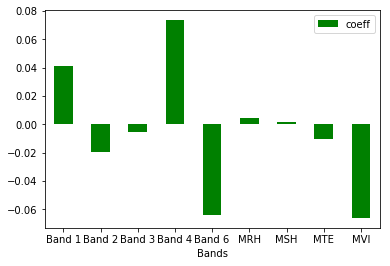

In [20]:
df.plot.bar(x='Bands', y='coeff', rot=0, color=('g'))
plt.show()

# Test Train Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_input, Y_output, test_size=0.30, random_state=42)

In [23]:
X_train.shape

(15872819, 9)

In [24]:
X_test.shape

(6802637, 9)

In [25]:
y_train.shape

(15872819,)

In [26]:
y_test.shape

(6802637,)

In [27]:
reg_train = linear_model.LinearRegression()
reg_train.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
reg_train.coef_

array([ 0.04117238, -0.01943191, -0.00543887,  0.07360524, -0.06410648,
        0.0046659 ,  0.00166654, -0.01039585, -0.06616658])

In [29]:
for feat, coef in zip(X_names, reg_train.coef_):
    print('{}       {}'.format(feat, coef))

Band 1       0.04117237725135131
Band 2       -0.019431909616573057
Band 3       -0.005438866505006151
Band 4       0.07360524079522564
Band 6       -0.06410647527683375
MRH       0.004665901569513417
MSH       0.0016665424874738423
MTE       -0.010395846853366053
MVI       -0.06616657570160563


In [30]:
df = pd.DataFrame({'Bands':input_names, 'coeff':reg_train.coef_})

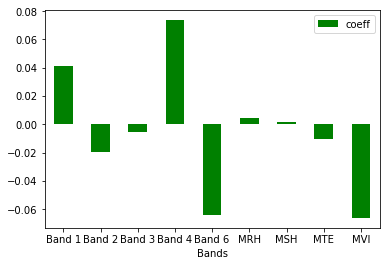

In [31]:
df.plot.bar(x='Bands', y='coeff', rot=0, color=('g'))
plt.show()

# Evaluation on Trained

In [32]:
predictions_train = reg_train.predict(X_train)

In [33]:
predictions_train.shape

(15872819,)

In [34]:
y_train.shape

(15872819,)

In [35]:
errors_train = abs(predictions_train - y_train)

In [36]:
errors_train

array([35.02743595,  0.09603679,  8.05180671, ...,  0.34905315,
        1.04507338,  1.13309471])

In [37]:
np.mean(errors_train)

3.1860789944469996

In [38]:
np.max(errors_train)

248.19847085241963

(array([1.23391e+05, 1.23659e+05, 1.23141e+05, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]),
 array([4.65244234e-08, 1.61714350e-02, 3.23428235e-02, ...,
        2.48166128e+02, 2.48182299e+02, 2.48198471e+02]),
 <a list of 15348 Patch objects>)

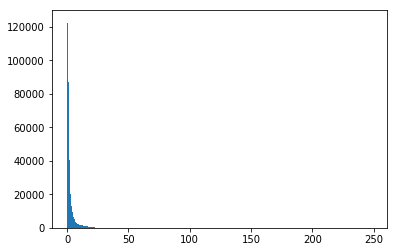

In [39]:
plt.hist(errors_train, bins='auto')

(array([2.737605e+06, 4.246880e+05, 7.728900e+04, 5.135300e+04,
        3.536400e+04, 2.537700e+04, 1.842300e+04, 1.410700e+04,
        1.077400e+04, 8.532000e+03, 6.532000e+03, 5.246000e+03,
        3.995000e+03, 3.025000e+03, 2.202000e+03, 1.608000e+03,
        1.311000e+03, 9.110000e+02, 6.750000e+02, 4.480000e+02,
        3.280000e+02, 1.830000e+02]),
 array([  3,  13,  23,  33,  43,  53,  63,  73,  83,  93, 103, 113, 123,
        133, 143, 153, 163, 173, 183, 193, 203, 213, 223]),
 <a list of 22 Patch objects>)

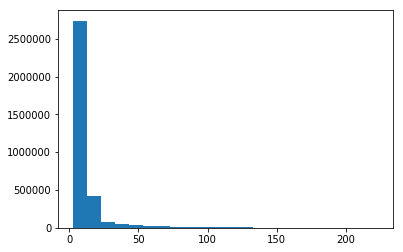

In [40]:
plt.hist(errors_train, bins=range(3, 225, 10))

In [41]:
np.sum(errors_train)

50572055.19855923

### Confusion Matrix

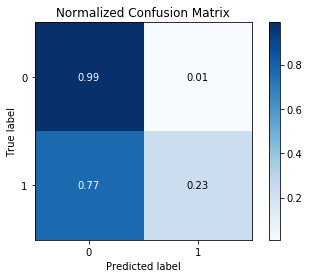

In [42]:
y_train_copy = np.copy(y_train)
y_train_copy[y_train_copy < 18] = 0
y_train_copy[y_train_copy >= 18] = 1

predictions_train_copy = np.copy(predictions_train)
predictions_train_copy[predictions_train_copy < 18] = 0
predictions_train_copy[predictions_train_copy >= 18] = 1

skplt.metrics.plot_confusion_matrix(y_train_copy, predictions_train_copy, normalize=True)
plt.show()

# Evaluation on Test

In [43]:
predictions_test = reg_train.predict(X_test)

In [44]:
predictions_test.shape

(6802637,)

In [45]:
y_test.shape

(6802637,)

In [46]:
errors_test = abs(predictions_test - y_test)

In [47]:
errors_test

array([7.77370207, 1.08036062, 4.37890243, ..., 3.47262351, 0.92088588,
       0.17457507])

In [48]:
np.min(errors_test)

2.247070582939159e-07

In [49]:
np.mean(errors_test)

3.1864353918655337

In [50]:
np.max(errors_test)

250.14017106925917

(array([7.0173e+04, 6.9752e+04, 7.0039e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([2.24707058e-07, 2.14383607e-02, 4.28764967e-02, ...,
        2.50097295e+02, 2.50118733e+02, 2.50140171e+02]),
 <a list of 11668 Patch objects>)

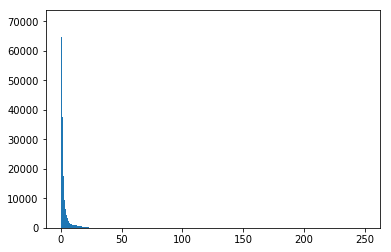

In [51]:
plt.hist(errors_test, bins='auto')

(array([2.94119e+05, 4.55590e+04, 2.47370e+04, 1.69750e+04, 1.19590e+04,
        8.66500e+03, 6.42300e+03, 4.92300e+03, 3.88900e+03, 2.95100e+03,
        2.40200e+03, 1.87600e+03, 1.41900e+03, 1.09100e+03, 8.25000e+02,
        5.53000e+02, 4.12000e+02, 3.24000e+02, 2.29000e+02, 1.54000e+02]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190, 200, 210]),
 <a list of 20 Patch objects>)

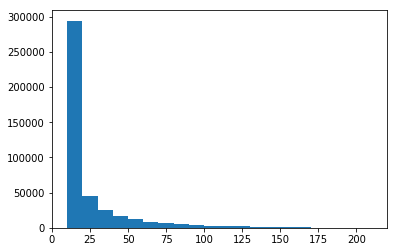

In [52]:
plt.hist(errors_test, bins=range(10, 220, 10))

In [53]:
np.sum(errors_test)

21676163.29481398

### Confusion Matrix


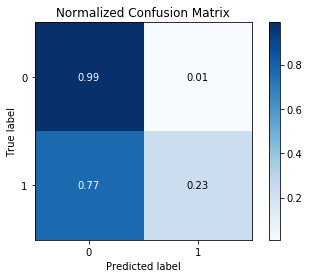

In [54]:
y_test_copy = np.copy(y_test)
y_test_copy[y_test_copy < 18] = 0
y_test_copy[y_test_copy >= 18] = 1

predictions_test_copy = np.copy(predictions_test)
predictions_test_copy[predictions_test_copy < 18] = 0
predictions_test_copy[predictions_test_copy >= 18] = 1

skplt.metrics.plot_confusion_matrix(y_test_copy, predictions_test_copy, normalize=True)
plt.show()